In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pickle


In [2]:
if tf.test.is_gpu_available():
    print('GPU is available')
else:
    print('GPU is NOT available')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [3]:
def remove_outliers_and_interpolate(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(x - mean) / std for x in data]
    filtered_data = [x if abs(z) < threshold else 0 for x, z in zip(data, z_scores)]
    return np.interp(np.arange(len(filtered_data)), np.flatnonzero(filtered_data), np.array(filtered_data)[np.flatnonzero(filtered_data)])

In [4]:

train1 = np.loadtxt("空间天气预报练习与作业/20150324_Gs_mag_1m.txt", skiprows=21)
train2 = np.loadtxt("空间天气预报练习与作业/20150325_Gs_mag_1m.txt", skiprows=21)
train3 = np.loadtxt("空间天气预报练习与作业/20150326_Gs_mag_1m.txt", skiprows=21)
# train2_filtered = train2.copy()
# train2_filtered[:, 6] = remove_outliers_and_interpolate(train2[:, 6])
# train2_filtered[:, 7] = remove_outliers_and_interpolate(train2[:, 7])
# train2_filtered[:, 8] = remove_outliers_and_interpolate(train2[:, 8])
# train2_filtered[:, 9] = remove_outliers_and_interpolate(train2[:, 9])






train = np.concatenate((train1, train2, train3), axis=0)
max_values = np.max(train, axis=0)
min_values = np.min(train, axis=0)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
train = min_max_scaler.fit_transform(train)
with open("min_max_scaler.pkl", "wb") as f:
    pickle.dump(min_max_scaler, f)
print(train.shape)

(3421, 10)


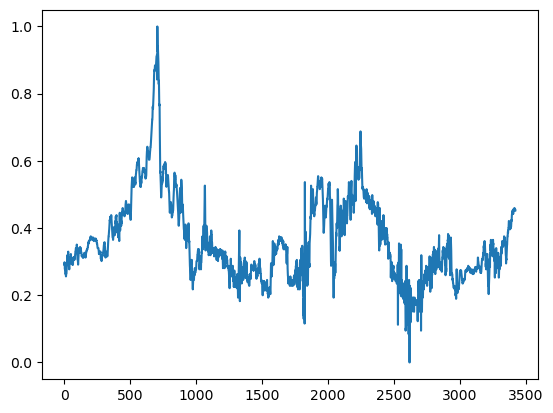

In [5]:
 
plt.plot(np.arange(3421),train[:,7])


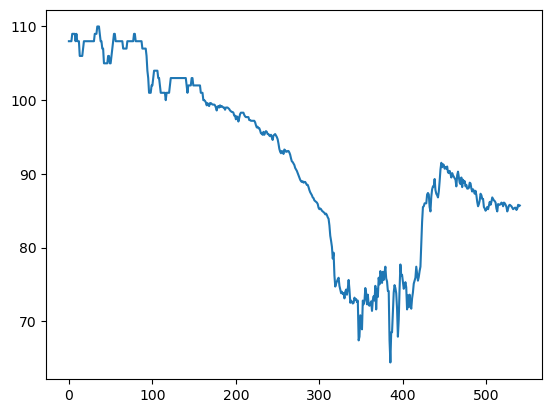

In [6]:
plt.plot(np.arange(541),train3[:,6])

In [7]:
# Create a LSTM neural network
model = Sequential()

# Add LSTM layer
# model.add(LSTM(units=100, activation='relu', input_shape=(100, 5),return_sequences=True))
model.add(LSTM(units=100, activation='sigmoid', input_shape=(100, 5)))

# model.add(LSTM(units=50, activation='relu'))

# Add output layer
model.add(Dense(units=10))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               42400     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
Total params: 43,410
Trainable params: 43,410
Non-trainable params: 0
_________________________________________________________________


In [8]:
new_X_train1 = np.zeros((3300, 100, 10))
new_Y_train = np.zeros((3300, 10))
for i in range(3300):
    new_X_train1[i] = train[i:i+100]

for i in range(3300):
    new_Y_train[i] = train[100+i:100+i+10,6]

new_X_train=new_X_train1[:,:,[3,5,6,7,8]]


In [9]:
model.fit(new_X_train[0:3000], new_Y_train[0:3000], epochs=1000, batch_size=128)

Epoch 1/1000
24/24 [==============================] - 4s 70ms/step - loss: 0.1970
Epoch 2/1000
24/24 [==============================] - 2s 71ms/step - loss: 0.0370
Epoch 3/1000
24/24 [==============================] - 2s 73ms/step - loss: 0.0299
Epoch 4/1000
24/24 [==============================] - 2s 73ms/step - loss: 0.0278
Epoch 5/1000
24/24 [==============================] - 2s 73ms/step - loss: 0.0260
Epoch 6/1000
24/24 [==============================] - 2s 74ms/step - loss: 0.0240
Epoch 7/1000
24/24 [==============================] - 2s 76ms/step - loss: 0.0220
Epoch 8/1000
24/24 [==============================] - 2s 77ms/step - loss: 0.0199
Epoch 9/1000
24/24 [==============================] - 2s 78ms/step - loss: 0.0176
Epoch 10/1000
24/24 [==============================] - 2s 76ms/step - loss: 0.0156
Epoch 11/1000
24/24 [==============================] - 3s 113ms/step - loss: 0.0135
Epoch 12/1000
24/24 [==============================] - 4s 151ms/step - loss: 0.0116
Epoch 13/10

[[0.55054337 0.54739416 0.54659945 ... 0.54485583 0.54148144 0.5388191 ]
 [0.55078727 0.54712707 0.54660755 ... 0.5445841  0.54101807 0.5384689 ]
 [0.55745184 0.5533732  0.5529461  ... 0.55020064 0.54625547 0.54405344]
 ...
 [0.3454508  0.34066743 0.33917487 ... 0.3407726  0.3395664  0.33409318]
 [0.34765765 0.34202874 0.34098488 ... 0.34100217 0.33880454 0.33390516]
 [0.32688928 0.32247612 0.3216068  ... 0.3235405  0.3232484  0.31695995]] [[0.5557656  0.56521739 0.57466919 ... 0.57466919 0.57466919 0.57466919]
 [0.56521739 0.57466919 0.57466919 ... 0.57466919 0.57466919 0.57466919]
 [0.57466919 0.57466919 0.57466919 ... 0.57466919 0.57466919 0.57466919]
 ...
 [0.35066163 0.32136106 0.30718336 ... 0.30812854 0.30340265 0.29867675]
 [0.32136106 0.30718336 0.31096408 ... 0.30340265 0.29867675 0.30056711]
 [0.30718336 0.31096408 0.31379962 ... 0.29867675 0.30056711 0.29773157]]


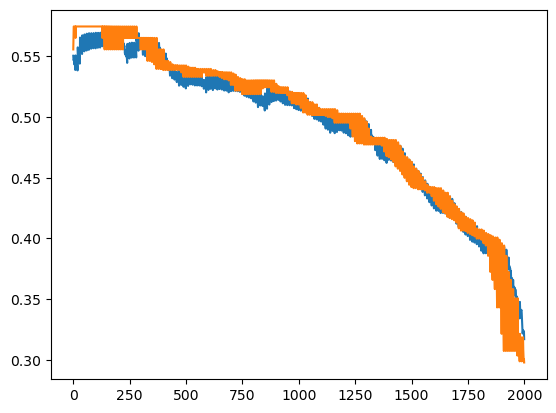

In [10]:
outputs = model(new_X_train[2900:3100])
yy=new_Y_train[2900:3100]
outputs=np.array(outputs)
print(outputs,yy)

plt.plot(np.arange(2000),outputs.reshape(-1))
plt.plot(np.arange(2000),yy.reshape(-1))

(1000.0, 2000.0)

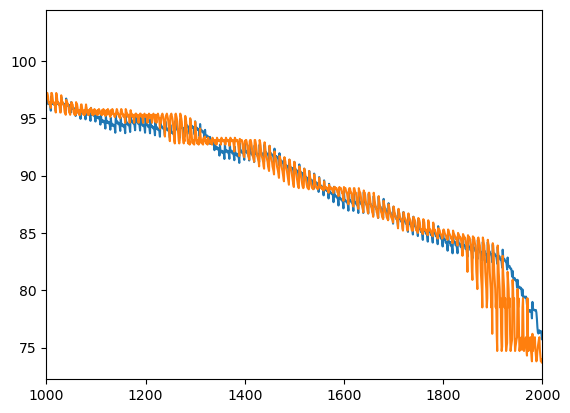

In [14]:
outputs1=((max_values[6]-min_values[6])*outputs+min_values[6]).reshape(-1)
outputs2=((max_values[6]-min_values[6])*yy+min_values[6]).reshape(-1)

plt.plot(np.arange(2000),outputs1.reshape(-1))
plt.plot(np.arange(2000),outputs2.reshape(-1))
#plt.xlim(1000,2000)
plt.xlim(1000,2000)


